In [16]:
#region [Imports : Declaring all Package Imports here]

import pandas
import seaborn
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
#region [Loading the data to Pandas Dataframe]

raw_data = pandas.read_csv('./diabetes.csv')
raw_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
#region [Preprocessing the Dataframe to remove NaN values, splitting into test & train & Feature Scaling the Data]

raw_data.fillna(raw_data.mean(), inplace = True)
features = raw_data.drop('Outcome', axis = 1)
target = raw_data['Outcome']

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.fit_transform(test_features)

In [19]:
#region [Running Logistic Regression on the data]

lr_model = LogisticRegression()
lr_model.fit(scaled_train_features, train_target)
prediction = lr_model.predict(scaled_test_features)

In [12]:
#region [Determining the Accuracy & generating classification report]

accuracy_score(test_target, prediction)
classification_report(test_target, prediction)

'              precision    recall  f1-score   support\n\n           0       0.81      0.87      0.84        99\n           1       0.73      0.64      0.68        55\n\n    accuracy                           0.79       154\n   macro avg       0.77      0.75      0.76       154\nweighted avg       0.78      0.79      0.78       154\n'

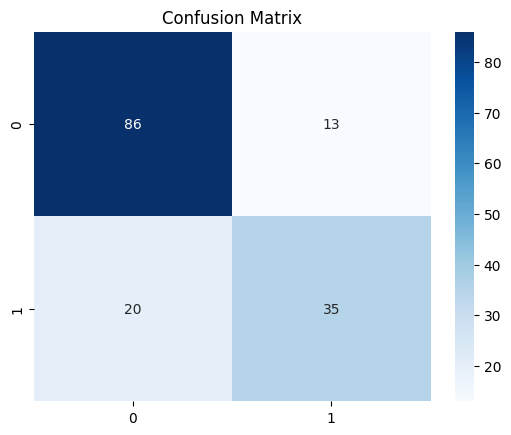

In [13]:
#region [Creating a Confusion Matrix to further understand the data prediction capabilities]

seaborn.heatmap(confusion_matrix(test_target, prediction), annot = True, fmt = 'd', cmap = 'Blues')
pyplot.title('Confusion Matrix')
pyplot.show()